# Exploratory Data Analysis :

In [1]:
# Import necessary library :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# LOad the data :
data = pd.read_csv("D:\Dataset files/googleplaystore.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# check missing (NaN) values :
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
#1) Reviews in object convert into int64.

df["Reviews"] = df["Reviews"].str.replace("3.0M","3000000")

In [8]:
df["Reviews"] = df["Reviews"].astype("int64")

In [9]:
df["Reviews"].dtype         #Done

dtype('int64')

In [10]:
df["Reviews"].value_counts()

0          596
1          272
2          214
3          175
4          137
          ... 
155693       1
12443        1
163997       1
37023        1
1385093      1
Name: Reviews, Length: 6002, dtype: int64

In [11]:
df["Size"]

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10841, dtype: object

In [12]:
#2) Size in object convert into int.

df["Size"].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
970k                     1
454k                     1
237k                     1
280k                     1
954k                     1
Name: Size, Length: 462, dtype: int64

In [13]:
df = df[df["Size"]!="Varies with device"]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9146 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9146 non-null   object 
 1   Category        9146 non-null   object 
 2   Rating          7730 non-null   float64
 3   Reviews         9146 non-null   int64  
 4   Size            9146 non-null   object 
 5   Installs        9146 non-null   object 
 6   Type            9146 non-null   object 
 7   Price           9146 non-null   object 
 8   Content Rating  9145 non-null   object 
 9   Genres          9146 non-null   object 
 10  Last Updated    9146 non-null   object 
 11  Current Ver     9138 non-null   object 
 12  Android Ver     9143 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1000.3+ KB


In [15]:
df["Size"].value_counts()

11M     198
12M     196
14M     194
13M     191
15M     184
       ... 
25k       1
220k      1
525k      1
924k      1
954k      1
Name: Size, Length: 461, dtype: int64

In [16]:
dummy = df["Size"]
dummy

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10835    9.6M
10836     53M
10837    3.6M
10838    9.5M
10840     19M
Name: Size, Length: 9146, dtype: object

In [17]:
ls = []
for i in dummy:
    if i[-1] == "M":
        ls.append(float(i.replace("M",""))*1024)
    elif i[-1] == "k":
        ls.append(float(i.replace("k","")))
    else:
        ls.append(float(i.replace('1,000+', "1000")))

In [18]:
ls

[19456.0,
 14336.0,
 8908.8,
 25600.0,
 2867.2,
 5734.4,
 19456.0,
 29696.0,
 33792.0,
 3174.4,
 28672.0,
 12288.0,
 20480.0,
 21504.0,
 37888.0,
 2764.8,
 5632.0,
 17408.0,
 39936.0,
 31744.0,
 14336.0,
 12288.0,
 4300.8,
 7168.0,
 23552.0,
 6144.0,
 25600.0,
 6246.4,
 4710.4,
 4300.8,
 9420.8,
 5324.8,
 11264.0,
 11264.0,
 4300.8,
 9420.8,
 24576.0,
 11264.0,
 9625.6,
 15360.0,
 10240.0,
 1228.8,
 12288.0,
 24576.0,
 26624.0,
 8192.0,
 8089.6,
 25600.0,
 57344.0,
 58368.0,
 35840.0,
 33792.0,
 33792.0,
 5734.4,
 55296.0,
 201.0,
 3686.4,
 5836.8,
 17408.0,
 8806.4,
 2457.6,
 27648.0,
 2764.8,
 2560.0,
 7168.0,
 35840.0,
 16384.0,
 16384.0,
 17408.0,
 3481.6,
 9113.6,
 3993.6,
 2969.6,
 38912.0,
 32768.0,
 37888.0,
 15360.0,
 5529.6,
 18432.0,
 38912.0,
 1126.4,
 8089.6,
 35840.0,
 17408.0,
 19456.0,
 14336.0,
 2252.8,
 4608.0,
 17408.0,
 14336.0,
 10035.2,
 21504.0,
 53248.0,
 14336.0,
 25600.0,
 9216.0,
 12288.0,
 35840.0,
 6860.8,
 30720.0,
 5836.8,
 2969.6,
 17408.0,
 2969.6,
 266

In [19]:
df["Size"] = ls

In [20]:
df["Size"].head()

0    19456.0
1    14336.0
2     8908.8
3    25600.0
4     2867.2
Name: Size, dtype: float64

In [21]:
df["Size"].dtype       #Done 

dtype('float64')

In [22]:
#3) installs also object convert into int 

df["Installs"] = df["Installs"].str.replace(",","")
df["Installs"] = df['Installs'].str.replace("+","")

In [23]:
df["Installs"].value_counts()

1000000       1303
100000        1054
10000         1011
1000           873
10000000       825
100            702
5000000        535
500000         492
5000           461
50000          446
10             376
500            322
100000000      201
50             201
50000000       147
5               78
1               64
500000000       30
0               14
1000000000      10
Free             1
Name: Installs, dtype: int64

In [24]:
# free word ahe installs col madhe, remove kel 
df = df[df["Installs"]!="Free"]

In [25]:
df["Installs"].value_counts()

1000000       1303
100000        1054
10000         1011
1000           873
10000000       825
100            702
5000000        535
500000         492
5000           461
50000          446
10             376
500            322
100000000      201
50             201
50000000       147
5               78
1               64
500000000       30
0               14
1000000000      10
Name: Installs, dtype: int64

In [26]:
df["Installs"].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000', '500000000',
       '50', '100', '500', '10', '1', '5', '1000000000', '0'],
      dtype=object)

In [27]:
df["Installs"] = df["Installs"].astype("int64")

In [28]:
df["Installs"].dtype      # Done

dtype('int64')

In [29]:
df["Price"].value_counts()

0         8421
$0.99      145
$2.99      114
$1.99       66
$4.99       65
          ... 
$30.99       1
$4.29        1
$1.20        1
$15.99       1
$37.99       1
Name: Price, Length: 87, dtype: int64

In [30]:
#4) In price col it is $sign so convert it.

df["Price"] = df["Price"].str.replace("$","")

In [31]:
df["Price"] = df["Price"].astype("float")

In [32]:
df["Price"].dtype

dtype('float64')

In [33]:
df["Price"].sort_values()*83

0           0.00
7423        0.00
7422        0.00
7421        0.00
7420        0.00
          ...   
5358    33199.17
5354    33199.17
5356    33199.17
5369    33199.17
4367    33200.00
Name: Price, Length: 9145, dtype: float64

In [34]:
df["Price"].unique()    #Done 

array([  0.  ,   4.99,   6.99,   1.49,   2.99,   3.99,   7.99,   5.99,
         1.99,   9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,
        79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,   3.49,  10.99,
         7.49,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,   2.49,
         4.49,   1.7 ,   2.  ,   3.88,  25.99, 399.99,  17.99, 400.  ,
         3.02,   1.76,   4.84,   4.77,   1.61,   1.59,   6.49,   1.29,
         5.  ,  13.99, 299.99, 379.99,  37.99,  18.99, 389.99,  19.9 ,
         8.49,   1.75,  14.  ,   4.85,  46.99, 109.99, 154.99,   3.08,
         2.59,   4.8 ,   8.99,   1.96,  19.4 ,  15.46,   3.04,   4.29,
         2.6 ,   3.28,   4.6 ,  28.99,   2.9 ,   1.97, 200.  ,  89.99,
         2.56,  30.99,   3.61, 394.99,   1.26,   1.2 ,   1.04])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          7729 non-null   float64
 3   Reviews         9145 non-null   int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
 10  Last Updated    9145 non-null   object 
 11  Current Ver     9137 non-null   object 
 12  Android Ver     9143 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1000.2+ KB


In [36]:
df["Last Updated"].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [37]:
df["Last Updated"] = df["Last Updated"].astype("datetime64[ns]")

In [38]:
df["Last Updated"].value_counts()      #Done

2018-08-03    212
2018-07-31    204
2018-08-02    188
2018-08-01    186
2018-07-30    140
             ... 
2015-03-16      1
2015-05-24      1
2011-10-12      1
2014-06-30      1
2014-08-11      1
Name: Last Updated, Length: 1358, dtype: int64

In [39]:
df.drop(["Genres","Android Ver","Current Ver"], axis=1, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9145 non-null   object        
 1   Category        9145 non-null   object        
 2   Rating          7729 non-null   float64       
 3   Reviews         9145 non-null   int64         
 4   Size            9145 non-null   float64       
 5   Installs        9145 non-null   int64         
 6   Type            9145 non-null   object        
 7   Price           9145 non-null   float64       
 8   Content Rating  9145 non-null   object        
 9   Last Updated    9145 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 785.9+ KB


In [41]:
df.reset_index(drop=True, inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9145 entries, 0 to 9144
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9145 non-null   object        
 1   Category        9145 non-null   object        
 2   Rating          7729 non-null   float64       
 3   Reviews         9145 non-null   int64         
 4   Size            9145 non-null   float64       
 5   Installs        9145 non-null   int64         
 6   Type            9145 non-null   object        
 7   Price           9145 non-null   float64       
 8   Content Rating  9145 non-null   object        
 9   Last Updated    9145 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 714.6+ KB


In [43]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,7729.000000,9.145000e+03,9145.000000,9.145000e+03,9145.000000
mean,4.173852,2.490487e+05,22032.553406,7.114842e+06,1.184366
std,0.544563,1.716211e+06,23131.222364,4.619357e+07,17.355754
min,1.000000,0.000000e+00,8.500000,0.000000e+00,0.000000
25%,4.000000,2.200000e+01,5017.600000,1.000000e+03,0.000000
50%,4.300000,7.420000e+02,13312.000000,1.000000e+05,0.000000
75%,4.500000,2.503700e+04,30720.000000,1.000000e+06,0.000000
max,5.000000,4.489389e+07,102400.000000,1.000000e+09,400.000000


In [44]:
df["Rating"].isna().sum()

1416

In [45]:
df["Rating"].fillna(df["Rating"].mean(), inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9145 entries, 0 to 9144
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9145 non-null   object        
 1   Category        9145 non-null   object        
 2   Rating          9145 non-null   float64       
 3   Reviews         9145 non-null   int64         
 4   Size            9145 non-null   float64       
 5   Installs        9145 non-null   int64         
 6   Type            9145 non-null   object        
 7   Price           9145 non-null   float64       
 8   Content Rating  9145 non-null   object        
 9   Last Updated    9145 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 714.6+ KB


In [47]:
df = df[df["Size"]>100]

In [48]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9095.000000,9.095000e+03,9095.000000,9.095000e+03,9095.000000
mean,4.174528,2.503741e+05,22153.407301,7.150647e+06,1.185639
std,0.501099,1.720828e+06,23137.060501,4.631760e+07,17.402973
min,1.000000,0.000000e+00,103.000000,0.000000e+00,0.000000
25%,4.100000,2.200000e+01,5120.000000,1.000000e+03,0.000000
50%,4.200000,7.570000e+02,13312.000000,1.000000e+05,0.000000
75%,4.500000,2.543250e+04,30720.000000,1.000000e+06,0.000000
max,5.000000,4.489389e+07,102400.000000,1.000000e+09,400.000000


In [49]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19456.0,10000,Free,0.0,Everyone,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14336.0,500000,Free,0.0,Everyone,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8908.8,5000000,Free,0.0,Everyone,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25600.0,50000000,Free,0.0,Teen,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2867.2,100000,Free,0.0,Everyone,2018-06-20
...,...,...,...,...,...,...,...,...,...,...
9140,FR Forms,BUSINESS,4.173852,0,9830.4,10,Free,0.0,Everyone,2016-09-29
9141,Sya9a Maroc - FR,FAMILY,4.500000,38,54272.0,5000,Free,0.0,Everyone,2017-07-25
9142,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3686.4,100,Free,0.0,Everyone,2018-07-06
9143,Parkinson Exercices FR,MEDICAL,4.173852,3,9728.0,1000,Free,0.0,Everyone,2017-01-20


In [50]:
df[["Type","Price"]].sort_values("Price")

,Type,Price
0,Free,0.00
5975,Free,0.00
5974,Free,0.00
5972,Free,0.00
5971,Free,0.00
...,...,...
3069,Paid,399.99
4090,Paid,399.99
4098,Paid,399.99
4112,Paid,399.99


In [51]:
df.groupby("Type").sum("Price")

,Rating,Reviews,Size,Installs,Price
Type,,,,,
Free,34971.570138,2273123334,1.871726e+08,64988070645,0.00
Paid,2995.760797,4028982,1.431267e+07,47067919,10783.39


In [52]:
df["Category"].value_counts()

FAMILY                 1830
GAME                   1015
TOOLS                   724
MEDICAL                 433
BUSINESS                396
PERSONALIZATION         351
LIFESTYLE               344
SPORTS                  311
FINANCE                 306
PRODUCTIVITY            299
HEALTH_AND_FITNESS      264
COMMUNICATION           258
PHOTOGRAPHY             253
NEWS_AND_MAGAZINES      215
DATING                  211
SOCIAL                  210
SHOPPING                199
BOOKS_AND_REFERENCE     196
TRAVEL_AND_LOCAL        191
VIDEO_PLAYERS           130
EDUCATION               111
MAPS_AND_NAVIGATION     108
FOOD_AND_DRINK          100
ENTERTAINMENT            90
LIBRARIES_AND_DEMO       79
AUTO_AND_VEHICLES        75
HOUSE_AND_HOME           68
ART_AND_DESIGN           62
WEATHER                  57
EVENTS                   57
PARENTING                54
COMICS                   51
BEAUTY                   47
Name: Category, dtype: int64

In [53]:
Category = df.groupby("Category")

In [54]:
Category.mean("Price")

,Rating,Reviews,Size,Installs,Price
Category,,,,,
ART_AND_DESIGN,4.351961,1.753779e+04,12667.870968,1.602227e+06,0.096290
AUTO_AND_VEHICLES,4.151816,1.323096e+04,20517.690667,5.836028e+05,0.153067
BEAUTY,4.266777,3.975660e+03,14126.842553,2.914245e+05,0.000000
BOOKS_AND_REFERENCE,4.281705,2.063669e+04,13698.696939,7.089902e+05,0.595816
BUSINESS,4.148670,1.550678e+04,14968.484848,1.353327e+06,0.435051
COMICS,4.132308,1.208224e+04,13808.505882,3.448265e+05,0.000000
COMMUNICATION,4.117109,4.529148e+05,12373.465116,1.907613e+07,0.233333
DATING,3.996713,1.848581e+04,17105.167773,6.724204e+05,0.096967
EDUCATION,4.385350,6.377884e+04,21289.574775,2.511730e+06,0.161802


In [55]:
content_rating = df.groupby("Content Rating")

In [56]:
content_rating.mean("Price")

,Rating,Reviews,Size,Installs,Price
Content Rating,,,,,
Adults only 18+,4.550000,3.701100e+04,23500.800000,7.500000e+05,0.000000
Everyone,4.168471,1.760334e+05,19882.636080,5.594637e+06,1.342100
Everyone 10+,4.257806,1.794519e+06,40878.018127,3.077695e+07,0.422115
Mature 17+,4.102725,1.151661e+05,26281.873399,3.380195e+06,0.258941
Teen,4.220657,3.439676e+05,31157.730091,1.241983e+07,0.659868
Unrated,4.136926,5.935000e+02,4556.800000,2.525000e+04,0.000000


In [57]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [58]:
df        #Pre_processing done

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19456.0,10000,Free,0.0,Everyone,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14336.0,500000,Free,0.0,Everyone,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8908.8,5000000,Free,0.0,Everyone,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25600.0,50000000,Free,0.0,Teen,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2867.2,100000,Free,0.0,Everyone,2018-06-20
...,...,...,...,...,...,...,...,...,...,...
9140,FR Forms,BUSINESS,4.173852,0,9830.4,10,Free,0.0,Everyone,2016-09-29
9141,Sya9a Maroc - FR,FAMILY,4.500000,38,54272.0,5000,Free,0.0,Everyone,2017-07-25
9142,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3686.4,100,Free,0.0,Everyone,2018-07-06
9143,Parkinson Exercices FR,MEDICAL,4.173852,3,9728.0,1000,Free,0.0,Everyone,2017-01-20


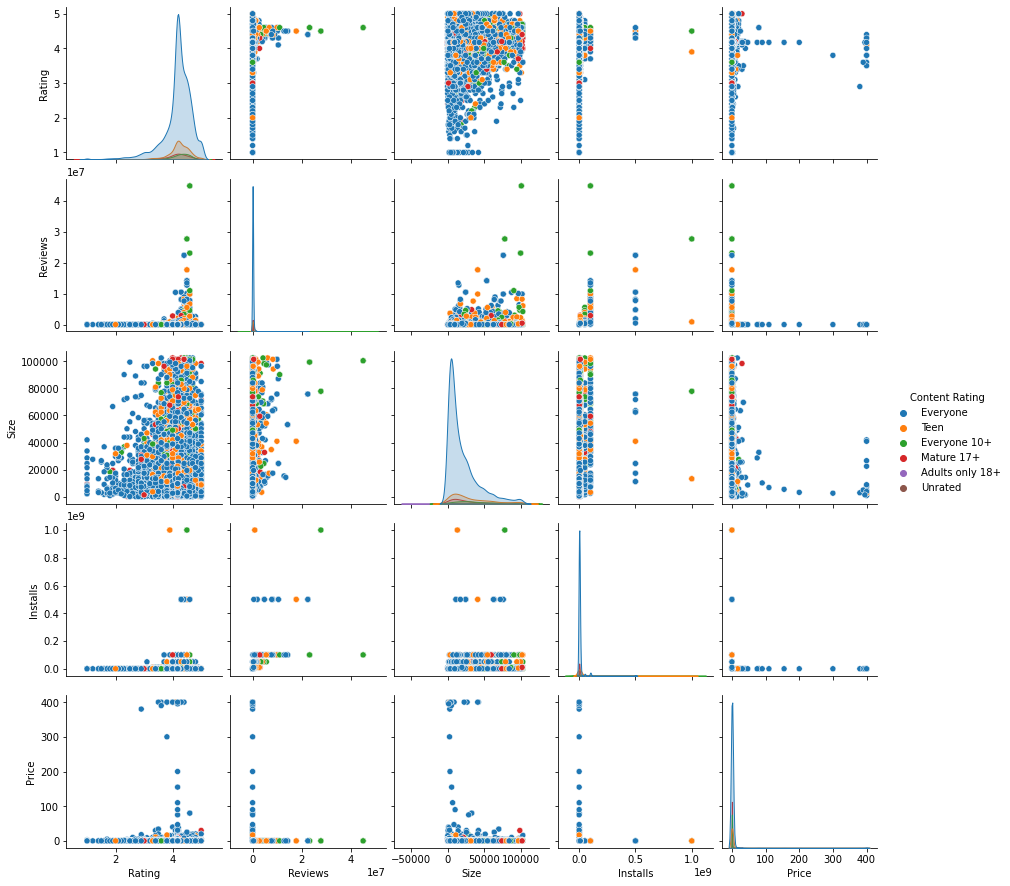

In [59]:
sns.pairplot(df, hue="Content Rating")

In [60]:
import missingno as msno

In [61]:
# To check it have nit missing values.
msno.matrix(df)
plt.show()

TypeError: type object got multiple values for keyword argument 'visible'

TypeError: type object got multiple values for keyword argument 'visible'

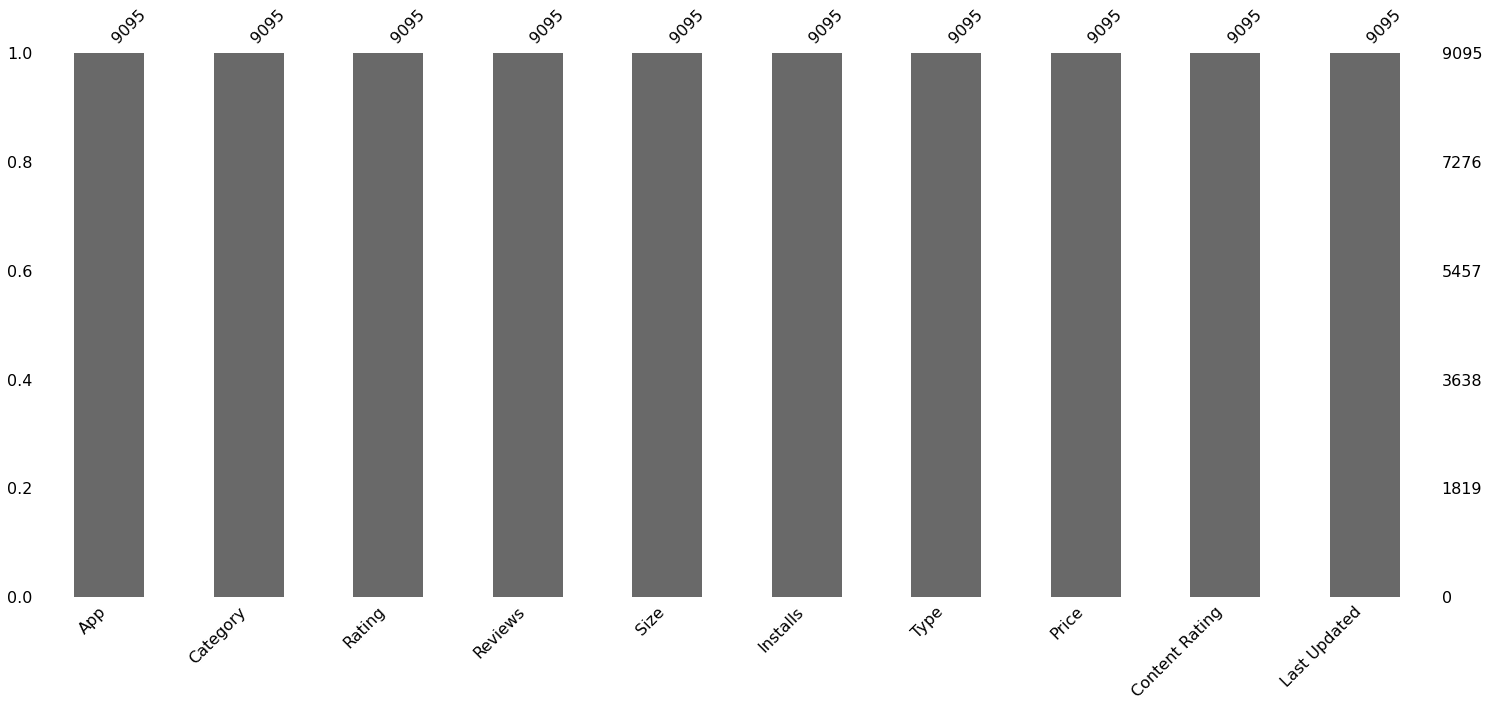

In [62]:
msno.bar(df)
plt.show()

In [63]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Last Updated      0
dtype: int64

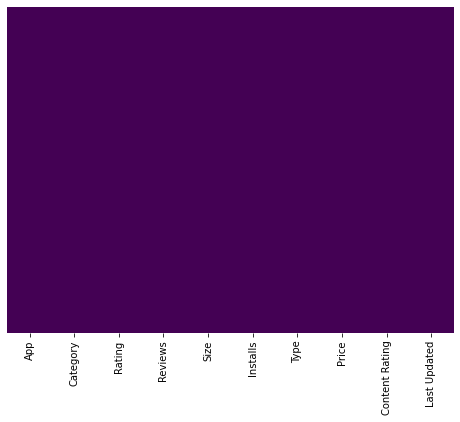

In [64]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False, cbar=False)
plt.show()

In [65]:
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Last Updated      datetime64[ns]
dtype: object

In [66]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19456.0,10000,Free,0.0,Everyone,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14336.0,500000,Free,0.0,Everyone,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8908.8,5000000,Free,0.0,Everyone,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25600.0,50000000,Free,0.0,Teen,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2867.2,100000,Free,0.0,Everyone,2018-06-20
...,...,...,...,...,...,...,...,...,...,...
9140,FR Forms,BUSINESS,4.173852,0,9830.4,10,Free,0.0,Everyone,2016-09-29
9141,Sya9a Maroc - FR,FAMILY,4.500000,38,54272.0,5000,Free,0.0,Everyone,2017-07-25
9142,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3686.4,100,Free,0.0,Everyone,2018-07-06
9143,Parkinson Exercices FR,MEDICAL,4.173852,3,9728.0,1000,Free,0.0,Everyone,2017-01-20


In [67]:
x = df.drop(columns="Rating")
y = df["Rating"]

In [68]:
x.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19456.0,10000,Free,0.0,Everyone,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,967,14336.0,500000,Free,0.0,Everyone,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8908.8,5000000,Free,0.0,Everyone,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25600.0,50000000,Free,0.0,Teen,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2867.2,100000,Free,0.0,Everyone,2018-06-20


In [69]:
y.head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [77]:
from sklearn.linear_model import LogisticRegression

In [81]:
model = LogisticRegression()

In [83]:
#model.fit(x_train, y_train)